# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the notebook will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I encourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [488]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

# pd.read_csv('case_study.csv')

In [423]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [424]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [425]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [426]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [427]:
pd.set_option('display.max_columns', 360)

In [428]:
# your code here
analysis = df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [429]:
# your code here
analysis.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [430]:
analysis['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [431]:
#your code here
analysis['PHYSHLTH'] = analysis['PHYSHLTH'].replace([99, 77, 88], [np.nan, np.nan, 0])

In [432]:
analysis.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [433]:
analysis['PHYSHLTH'].value_counts(dropna=False)

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
NaN       798
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
26.0        7
24.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [434]:
# descriptive statistics
analysis['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (8).

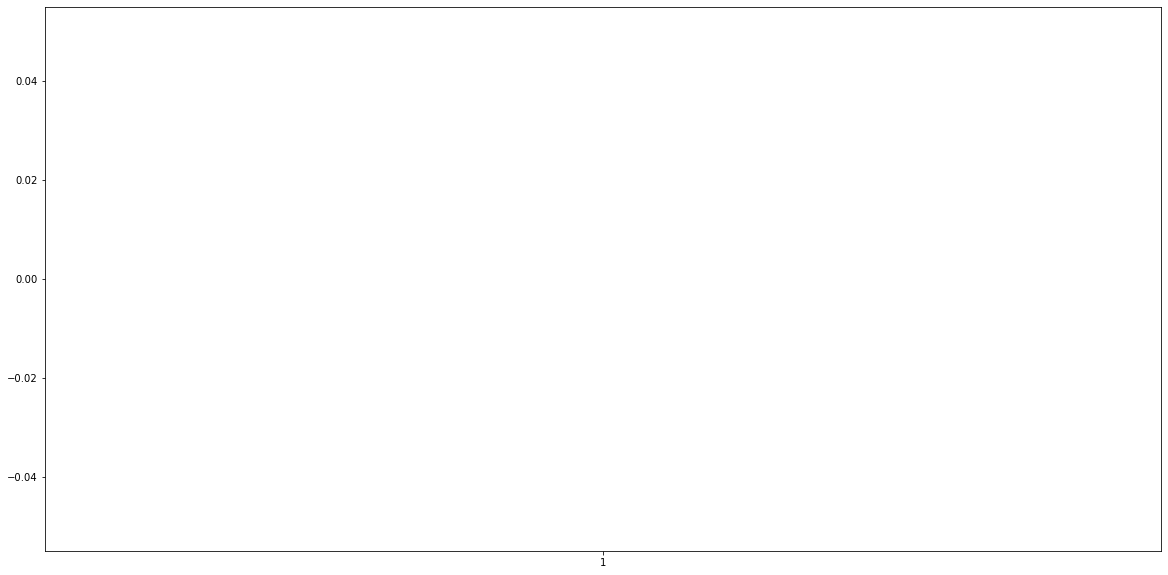

In [435]:
fig, ax = plt.subplots(figsize=(20,10))
days_sick = analysis['PHYSHLTH']

ax.boxplot(days_sick)

ax.set_xticklabels('PHYSHLTH')
ax.set_ylabel("Days Sick")
;

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


''

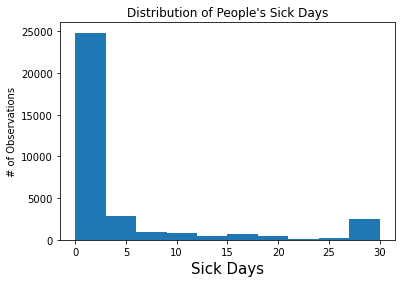

In [436]:
# graph the distribution of data
fig, ax = plt.subplots()
ax.hist(list(analysis['PHYSHLTH']))

ax.set_title("Distribution of People's Sick Days")
ax.set_xlabel("Sick Days", size=15)
ax.set_ylabel("# of Observations")
;

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [437]:
analysis.groupby(['_STATE']).describe()

FMONTH                                                   IDATE  \
          count      mean       std  min  25%  50%   75%   max    count   
_STATE                                                                    
9.0     10588.0  6.183037  3.596269  1.0  3.0  6.0  10.0  12.0  10588.0   
34.0    11708.0  7.858387  3.227503  1.0  6.0  8.0  10.0  12.0  11708.0   
36.0    12249.0  6.792228  3.418600  1.0  4.0  7.0  10.0  12.0  12249.0   

                                                                     \
                mean           std        min        25%        50%   
_STATE                                                                
9.0     6.462077e+06  3.603823e+06  1012018.0  3122017.0  6162017.0   
34.0    8.220029e+06  3.166315e+06  1022017.0  6302017.0  8252017.0   
36.0    7.070543e+06  3.436660e+06  1022017.0  4092017.0  7172017.0   

                                 IMONTH                                     \
               75%         max    count      mean       std  min  25%  50%   
_STATE                                                                       
9.0     10152017.0  12312017.0  10588.0  6.308651  3.608174  1.0  3.0  6.0   
34.0    11052017.0  12302017.0  11708.0  8.060044  3.154310  1.0  6.0  8.0   
36.0    10152017.0  12302017.0  12249.0  6.920892  3.444322  1.0  4.0  7.0   

                       IDAY                                                   \
         75%   max    count       mean       std  min  25%   50%   75%   max   
_STATE                                                                         
9.0     10.0  12.0  10588.0  15.140820  8.093467  1.0  9.0  15.0  21.0  31.0   
34.0    11.0  12.0  11708.0  15.796720  9.237978  1.0  7.0  16.0  23.0  31.0   
36.0    10.0  12.0  12249.0  14.763409  8.985793  1.0  7.0  14.0  22.0  31.0   

          IYEAR                                                         \
          count         mean       std     min     25%     50%     75%   
_STATE                                                                   
9.0     10588.0  2017.003211  0.056579  2017.0  2017.0  2017.0  2017.0   
34.0    11708.0  2017.000342  0.018481  2017.0  2017.0  2017.0  2017.0   
36.0    12249.0  2017.000490  0.022128  2017.0  2017.0  2017.0  2017.0   

               DISPCODE                                                  \
           max    count         mean        std     min     25%     50%   
_STATE                                                                    
9.0     2018.0  10588.0  1119.418209  39.558841  1100.0  1100.0  1100.0   
34.0    2018.0  11708.0  1114.895798  35.606225  1100.0  1100.0  1100.0   
36.0    2018.0  12249.0  1120.948649  40.695875  1100.0  1100.0  1100.0   

                          SEQNO                                           \
           75%     max    count          mean          std           min   
_STATE                                                                     
9.0     1100.0  1200.0  10588.0  2.017005e+09  3057.871927  2.017000e+09   
34.0    1100.0  1200.0  11708.0  2.017006e+09  3383.371090  2.017000e+09   
36.0    1100.0  1200.0  12249.0  2.017006e+09  3536.126058  2.017000e+09   

                                                                   _PSU  \
                 25%           50%           75%           max    count   
_STATE                                                                    
9.0     2.017003e+09  2.017005e+09  2.017008e+09  2.017011e+09  10588.0   
34.0    2.017003e+09  2.017006e+09  2.017009e+09  2.017012e+09  11708.0   
36.0    2.017003e+09  2.017006e+09  2.017009e+09  2.017012e+09  12249.0   

                                                                             \
                mean          std           min           25%           50%   
_STATE                                                                        
9.0     2.017005e+09  3057.871927  2.017000e+09  2.017003e+09  2.017005e+09   
34.0    2.017006e+09  3383.371090  2.017000e+09  2.017003e+09

In [438]:
# code to calculate the average number of sick days by state

analysis.groupby(['_STATE']).agg('mean')['PHYSHLTH']

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

''

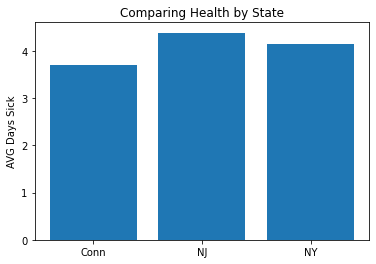

In [439]:
fig, ax = plt.subplots()

tri_state_sick = analysis.groupby(['_STATE']).agg('mean')['PHYSHLTH']


ax.bar(["Conn", "NJ", "NY"], tri_state_sick.values)
ax.set_title("Comparing Health by State")
ax.set_ylabel("AVG Days Sick")
;

In [440]:
# code to graph those averages using matplotlib


In [441]:
analysis[analysis['_STATE'] == 9.0]['PHYSHLTH']

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
60521     0.0
60522     0.0
60523    30.0
60524     0.0
60525    14.0
Name: PHYSHLTH, Length: 10588, dtype: float64

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountere

''

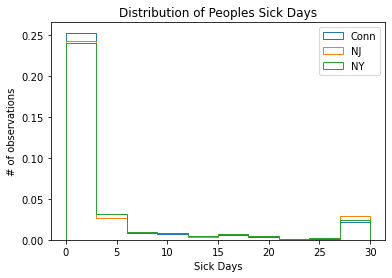

In [444]:
fig, ax = plt.subplots()

sick_day_conn = analysis[analysis['_STATE'] == 9.0]['PHYSHLTH']
sick_day_nj = analysis[analysis['_STATE'] == 34.0]['PHYSHLTH']
sick_day_ny = analysis[analysis['_STATE'] == 36.0]['PHYSHLTH']

ax.hist(sick_day_conn, label="Conn", density=True, histtype = 'step')
ax.hist(sick_day_nj, label="NJ", density=True, histtype = 'step')
ax.hist(sick_day_ny, label="NY", density=True, histtype = 'step')

ax.set_title("Distribution of Peoples Sick Days")
ax.set_ylabel("# of observations")
ax.set_xlabel("Sick Days")
ax.legend()
;

In [385]:
# graphic showing the histogram of data



## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [386]:
# code to create new colum for chronically sick

# df['chron'] = np.where(df['PHYSHLTH']>20, 1, 0)

In [455]:
analysis['CHRONIC'] = np.where(analysis['PHYSHLTH']>20, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [458]:
analysis.head(3)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron,CHRONIC
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [459]:
sick_ppl_conn = (len(analysis[(analysis['chron'] ==1) & (analysis['_STATE'] == 9.0)])) / len(analysis['_STATE'] == 9.0)
sick_ppl_nj = (len(analysis[(analysis['chron'] ==1) & (analysis['_STATE'] == 34.0)])) / len(analysis['_STATE'] == 34.0)
sick_ppl_ny = (len(analysis[(analysis['chron'] ==1) & (analysis['_STATE'] == 36.0)])) / len(analysis['_STATE'] == 36.0)

In [460]:
print(sick_ppl_conn)
print(sick_ppl_nj)
print(sick_ppl_ny)

0.02214502822405558
0.0313504125054277
0.02787668258792879


In [462]:
# code to calculate averages per state
analysis.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.072252
34.0    0.092501
36.0    0.078619
Name: CHRONIC, dtype: float64

AttributeError: 'Rectangle' object has no property 'rotation'

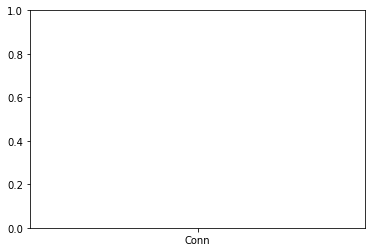

In [464]:
fig, ax = plt.subplots()
states = ["Conn", "NJ", "NY"]
chronic = analysis.groupby('_STATE')['CHRONIC'].mean().values
ax.bar(states, chronic, rotation=90 )
;

In [465]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [466]:
# def smokers(df):
#     if df['IS_SMOKER'] == 'smokers':
#         if df['SMOKDAY2'] == 1: 
#             return 'every_day'
#         if df['SMOKDAY2'] == 2:
#             return 'some_days'
#         if df['SMOKDAY2'] == 3:
#             return 'not_at_all'
#         if df['SMOKDAY2'] == 7:
#             return 'dont_know'
#         if df['SMOKDAY2'] == 9:
#             return 'refused'
        
# analysis['SMOKE_FRK'] = analysis.applymap(smokers)

In [467]:
def non_smokers(val):
    if val == 2:
        return 'non_smoker'
    if val == 7:
        return 'non_smoker'    
    if val == 9:
        return 'non_smoker'
    if val == 1: 
        return 'smokers'
    
analysis['IS_SMOKER'] = analysis['SMOKE100'].map(non_smokers)
    

In [468]:
analysis['IS_SMOKER'].value_counts

<bound method IndexOpsMixin.value_counts of 49938     non_smoker
49939     non_smoker
49940     non_smoker
49941     non_smoker
49942        smokers
             ...    
303774       smokers
303775    non_smoker
303776       smokers
303777    non_smoker
303778    non_smoker
Name: IS_SMOKER, Length: 34545, dtype: object>

In [469]:
analysis['ALL_SMOKE'] = analysis['SMOKDAY2'].replace([1, 2, 3, 7, 9, np.nan], ['every_day', 'some_days', 'not_at_all', 'not_sure', 'refused', 'non_smoker'])

In [470]:
analysis._STATE.replace([9, 34, 36], ["Conn", "NJ", "NY"], inplace=True)

In [471]:
analysis['ALL_SMOKE'].unique()

array(['non_smoker', 'not_at_all', 'every_day', 'some_days', 'refused',
       'not_sure'], dtype=object)

In [472]:
analysis.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,...,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron,CHRONIC,IS_SMOKER,ALL_SMOKE
49938,Conn,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [400]:
# your code here

non_smoker    0.601013
not_at_all    0.280880
every_day     0.077464
some_days     0.039687
refused       0.000782
not_sure      0.000174
Name: ALL_SMOKE, dtype: float64


<ipython-input-473-c2b6bf0c80cd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(smoke.index, rotation=90)


''

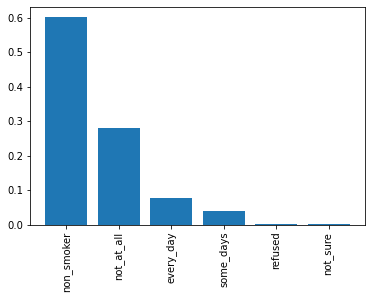

In [473]:
fig, ax = plt.subplots()

smoke = analysis['ALL_SMOKE'].value_counts(normalize = True)
print(smoke)
ax.bar(smoke.index, smoke.values)
ax.set_xticklabels(smoke.index, rotation=90)
;

In [402]:
# code to graph those proportion of differen smoking groups using matplotlib


In [403]:
analysis[analysis['_STATE'] == 'Conn']['ALL_SMOKE'].values

array(['non_smoker', 'non_smoker', 'non_smoker', ..., 'non_smoker',
       'non_smoker', 'non_smoker'], dtype=object)

''

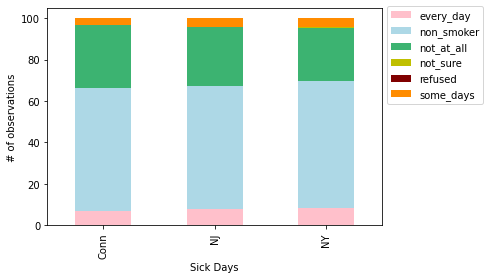

In [476]:
# your code here
fig, ax = plt.subplots()

# unstack takes 2nd axis of groupby statement and moves it to the top
smoke = analysis.groupby('_STATE')['ALL_SMOKE'].value_counts(normalize=True).unstack() * 100

smoke.plot.bar(stacked=True, ax=ax, color=['pink', 'lightblue', 'mediumseagreen', 'y', 'maroon', 'darkorange'])

ax.set_ylabel("# of observations")
ax.set_xlabel("Sick Days")
ax.legend(bbox_to_anchor= (1.0, 1.03)) #specify where the legend box will go
;

In [405]:
#graph showing the breakdown of smokers per state

In [480]:
analysis.groupby(['ALL_SMOKE']).agg('mean')['PHYSHLTH']

ALL_SMOKE
every_day     6.653007
non_smoker    3.374673
not_at_all    4.581841
not_sure      2.500000
refused       6.476190
some_days     6.295659
Name: PHYSHLTH, dtype: float64

<ipython-input-407-adfcf1839411>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(smoke_sick_x, rotation=90)


''

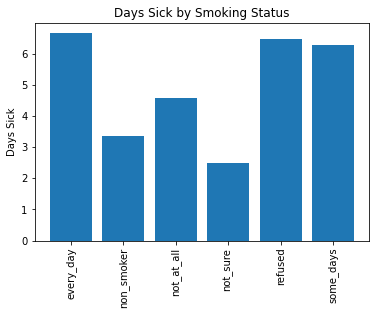

In [407]:
fig, ax = plt.subplots()

smoke_sick_x = analysis.groupby(['ALL_SMOKE']).agg('mean')['PHYSHLTH'].index
smoke_sick_y = analysis.groupby(['ALL_SMOKE']).agg('mean')['PHYSHLTH'].values

plt.bar(smoke_sick_x, smoke_sick_y)
ax.set_title("Days Sick by Smoking Status")
ax.set_ylabel("Days Sick")
ax.set_xticklabels(smoke_sick_x, rotation=90)
;

In [ ]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [249]:
analysis['ALCDAY5'].median

<bound method Series.median of 49938     101.0
49939     230.0
49940     888.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775    888.0
303776    204.0
303777    999.0
303778    230.0
Name: ALCDAY5, Length: 34545, dtype: float64>

In [300]:
# code here to clean up the ALCDAY5 responses
def alcday_clean(val):

    if val == 888:
        return 0
    if val == 999:
        return None
    if val == 777:
        return 1 #median of alcday5
    if val >= 101 and val <= 107: #days per week
        return str(val)[1:3]
    if val >= 201 and val <= 230: #past 30 days
        return str(val)[1:3]
    
analysis['ALCDAY5'] = analysis['ALCDAY5'].map(alcday_clean)

In [301]:
print(analysis['ALCDAY5'])

49938       01
49939       30
49940        0
49941       03
49942       01
          ... 
303774      03
303775       0
303776      04
303777    None
303778      30
Name: ALCDAY5, Length: 34545, dtype: object


In [302]:
#descriptive statistics of cleaned data
analysis['ALCDAY5'].describe()

count     32437
unique       32
top           0
freq      13043
Name: ALCDAY5, dtype: int64

In [303]:
type(analysis['ALCDAY5'])

pandas.core.series.Series

In [308]:
alcoholic = list(analysis['ALCDAY5'])

# cleanedList = [x for x in alcoholic if x != np.nan]
cleanedList = [x for x in cleanedList if x != None]
# cleanedList = [x for x in alcoholic if x != np.nan]
cleanedList = [int(x) for x in cleanedList]
print(cleanedList)

[1, 30, 0, 3, 1, 4, 30, 4, 0, 5, 0, 30, 7, 0, 5, 15, 2, 1, 7, 20, 0, 3, 0, 0, 15, 2, 30, 7, 0, 14, 0, 0, 7, 2, 1, 15, 7, 10, 0, 4, 2, 1, 0, 0, 20, 4, 0, 5, 1, 0, 0, 0, 0, 30, 0, 8, 20, 0, 4, 7, 2, 7, 5, 4, 0, 30, 8, 5, 4, 0, 15, 2, 29, 1, 0, 0, 14, 2, 0, 3, 1, 10, 1, 3, 0, 0, 8, 0, 30, 20, 27, 0, 2, 10, 2, 0, 8, 3, 20, 0, 0, 30, 1, 4, 0, 2, 1, 0, 3, 2, 4, 0, 3, 4, 26, 10, 16, 8, 3, 4, 5, 6, 1, 8, 2, 0, 1, 2, 30, 7, 0, 1, 2, 1, 2, 3, 0, 20, 0, 5, 0, 1, 0, 4, 1, 0, 8, 3, 5, 3, 0, 0, 2, 22, 1, 2, 1, 30, 2, 0, 0, 0, 1, 2, 4, 10, 2, 3, 2, 2, 2, 2, 1, 20, 0, 0, 20, 30, 0, 2, 20, 15, 1, 1, 4, 1, 2, 3, 20, 20, 6, 30, 4, 0, 25, 2, 0, 0, 2, 0, 3, 0, 20, 0, 7, 0, 30, 0, 1, 30, 4, 1, 0, 0, 2, 4, 0, 1, 0, 1, 15, 0, 0, 0, 0, 2, 0, 0, 3, 1, 2, 4, 0, 0, 0, 2, 8, 2, 0, 4, 5, 2, 0, 1, 3, 8, 5, 2, 3, 2, 0, 1, 0, 0, 0, 15, 4, 0, 0, 3, 0, 30, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 5, 5, 0, 30, 0, 1, 7, 0, 2, 3, 3, 4, 1, 1, 2, 4, 0, 8, 0, 4, 1, 4, 3, 25, 0, 0, 1, 0, 2, 4, 4, 4, 0, 0, 1, 0, 2, 0, 0, 8, 3, 2, 0, 7, 5,

''

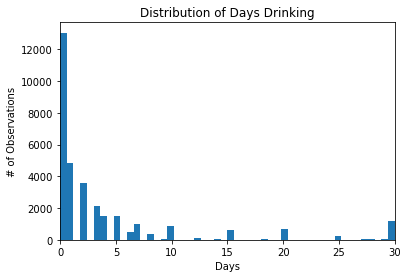

In [309]:
# graphic showing the histogram of data
fig, ax = plt.subplots()


# analysis['ALCDAY5'] = analysis['ALCDAY5'].astype(int)

ax.hist(cleanedList, bins=50)
ax.set_xlim(0,30)
ax.set_title("Distribution of Days Drinking")
ax.set_xlabel("Days")
ax.set_ylabel("# of Observations")
;

In [318]:
# code to calculate averages per state
analysis['ALCDAY5'] = analysis['ALCDAY5'].astype(float)
print(analysis['ALCDAY5'])

In [320]:
analysis.groupby('_STATE').agg('mean')['ALCDAY5']

_STATE
9.0     4.483450
34.0    3.530726
36.0    3.599912
Name: ALCDAY5, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))


bystate =  analysis.groupby('_STATE')['ALL_SMOKE'].value_counts(normalize=True).unstack() * 100

In [333]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
# x = analysis['ALCDAY5']
# y = analysis['PHYSHLTH']
correlation = analysis['ALCDAY5']. corr(analysis['PHYSHLTH'])
correlation

-0.07083255917832688

In [481]:
analysis[['PHYSHLTH', 'ALCDAY5']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
ALCDAY5     0.152252
Name: PHYSHLTH, dtype: float64

''

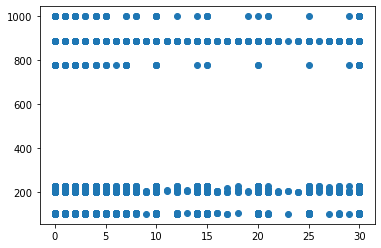

In [410]:
fig, ax = plt.subplots()

ax.scatter(analysis['PHYSHLTH'], analysis['ALCDAY5'])
;

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [483]:
ill_days_mean = analysis['PHYSHLTH'].mean()
ill_days_mean

4.085340919192817

In [485]:
ill_days_std = analysis['PHYSHLTH'].std()
ill_days_mean

4.085340919192817

In [486]:
ill_days_n = len(analysis['PHYSHLTH'])
ill_days_n

34545

In [490]:
ill_days_tval = st.t.ppf(0.975, ill_days_n-1)
ill_days_tval

1.960032660806259

In [491]:
ill_days_margin_err = (ill_days_tval * ill_days_std) / (ill_days_n **.5)
ill_days_margin_err

0.08977765815300284

In [492]:
ill_days_ci = (ill_days_mean - ill_days_margin_err, ill_days_mean + ill_days_margin_err)
ill_days_ci

(3.9955632610398144, 4.17511857734582)

In [493]:
chron_days_mean = analysis['CHRONIC'].mean()
chron_days_mean

0.08137212331741207

In [494]:
chron_days_std = analysis['CHRONIC'].std()
chron_days_mean

0.08137212331741207

In [495]:
chron_days_n = len(analysis['CHRONIC'])
chron_days_n

34545

In [497]:
chron_days_tval = st.t.ppf(0.975, chron_days_n-1)
chron_days_tval

1.960032660806259

In [498]:
chron_days_margin_err = (chron_days_tval * chron_days_std) / (chron_days_n **.5)
chron_days_margin_err

0.0028832654656173622

In [499]:
chron_days_ci = (chron_days_mean - chron_days_margin_err, chron_days_mean + chron_days_margin_err)
chron_days_ci

(0.07848885785179471, 0.08425538878302943)

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic against the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

## 9. Hypothesis Tests 

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. Based on the sample, assess whether or not the population mean is 4.
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [502]:
physhlth_null = "H0: The population mean is not 4"
physhlth_alt = "H1: The population mean is 4"

print(physhlth_null)
print(physhlth_alt)

H0: The population mean is not 4
H1: The population mean is 4


### 9.B The following questions are regarding the  `CHRONIC` variable.
1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

In [503]:
chron_null = "H0: The population proportion of chronically sick people is not 0.10"
chron_alt = "H1: The population proportionof chronically sick people IS 0.10"

print(chron_null)
print(chron_alt)

H0: The population proportion of chronically sick people is not 0.10
H1: The population proportionof chronically sick people IS 0.10


# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.